In [76]:
#!/usr/bin/env python3
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

In [77]:
import pathlib
path = pathlib.Path().absolute()
graph_lib = path.joinpath("benchmark").joinpath("graphs")
import kube_env
import kube_util as util

In [82]:
filters = ["filter_no_isomorphism", "filter_no_serialization", "filter_service_name", "rs-empty-filter", "filter_read_and_store"]
stats = []
for filter in filters:
    stats.append(f"{graph_lib}/online_boutique_benchmark_{filter}_stats.csv")
filters.append("no_filter")
stats.append(f"{graph_lib}/online_boutique_benchmark_stats.csv")


In [83]:
dfs = []
pref_path = "Aggregated"
for stat_file in stats:
    print(stat_file)
    df = pd.read_csv(stat_file)
    latency = []                                                            
    percentages = [50, 66, 75, 80, 90, 95, 98, 99, 100]
    
    path_df = df.loc[df["Name"] == pref_path]                            
    for percentile in percentages:                                          
        key = str(percentile)                                               
        latency.append(float(path_df[f"{key}%"]))                           
    dfs.append(                                                             
        pd.DataFrame({                                                      
            "Latency (ms)": latency,                                        
            "Percent": percentages                                          
    }))
    

/Users/jessicaberg/Documents/Tracing/tracing_env/kubernetes_env/benchmark/graphs/online_boutique_benchmark_filter_no_isomorphism_stats.csv
/Users/jessicaberg/Documents/Tracing/tracing_env/kubernetes_env/benchmark/graphs/online_boutique_benchmark_filter_no_serialization_stats.csv
/Users/jessicaberg/Documents/Tracing/tracing_env/kubernetes_env/benchmark/graphs/online_boutique_benchmark_filter_service_name_stats.csv
/Users/jessicaberg/Documents/Tracing/tracing_env/kubernetes_env/benchmark/graphs/online_boutique_benchmark_rs-empty-filter_stats.csv
/Users/jessicaberg/Documents/Tracing/tracing_env/kubernetes_env/benchmark/graphs/online_boutique_benchmark_filter_read_and_store_stats.csv
/Users/jessicaberg/Documents/Tracing/tracing_env/kubernetes_env/benchmark/graphs/online_boutique_benchmark_stats.csv


Text(0.5, 1.0, 'Latencies from VM in same zone: Aggregated')

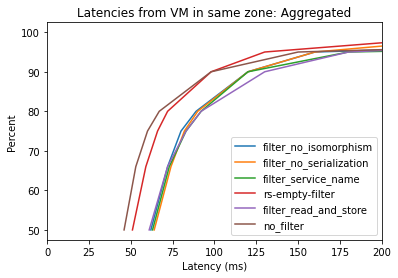

In [84]:
for df in dfs:
    sns.lineplot(data=df, x="Latency (ms)", y="Percent")
plt.legend(labels=filters)                                              
plt.xlim(0,200)                                                        
plt.title(f"Latencies from VM in same zone: {pref_path}") 

In [85]:
new_pref_path = pref_path.replace('/', '')
save_fig_name = f"{graph_lib}/gcloud_vm_{new_pref_path}.png"
plt.savefig(save_fig_name) 

<Figure size 432x288 with 0 Axes>